# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city.replace(' ', '+')}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | sodra sandby
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | hami
Processing Record 6 of Set 1 | severo-yeniseyskiy
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | ambovombe
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | nong khae
Processing Record 13 of Set 1 | kingston
Processing Record 14 of Set 1 | nadi
Processing Record 15 of Set 1 | mahajanga
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | al kharijah
Processing Record 22 of Set 1 | labuan
Processing Recor

Processing Record 43 of Set 4 | bikenibeu village
Processing Record 44 of Set 4 | anderson
Processing Record 45 of Set 4 | nouadhibou
Processing Record 46 of Set 4 | georgetown
Processing Record 47 of Set 4 | saskatoon
Processing Record 48 of Set 4 | queenstown
Processing Record 49 of Set 4 | luderitz
Processing Record 0 of Set 5 | udachny
Processing Record 1 of Set 5 | torghay
Processing Record 2 of Set 5 | bandarbeyla
Processing Record 3 of Set 5 | priob'ye
Processing Record 4 of Set 5 | lorengau
Processing Record 5 of Set 5 | yichang
Processing Record 6 of Set 5 | flin flon
Processing Record 7 of Set 5 | kuta
Processing Record 8 of Set 5 | vung tau
Processing Record 9 of Set 5 | la passe
Processing Record 10 of Set 5 | levuka
Processing Record 11 of Set 5 | khandyga
Processing Record 12 of Set 5 | pisco
Processing Record 13 of Set 5 | posto fiscal rolim de moura
Processing Record 14 of Set 5 | taltal
Processing Record 15 of Set 5 | utrik
Processing Record 16 of Set 5 | puerto escond

Processing Record 37 of Set 8 | coquimbo
Processing Record 38 of Set 8 | eldorado at santa fe
Processing Record 39 of Set 8 | pangkalanbuun
Processing Record 40 of Set 8 | hailey
Processing Record 41 of Set 8 | chililabombwe
Processing Record 42 of Set 8 | impfondo
Processing Record 43 of Set 8 | carbonear
Processing Record 44 of Set 8 | chaoyang
Processing Record 45 of Set 8 | yirol
City not found. Skipping...
Processing Record 46 of Set 8 | tintafor
Processing Record 47 of Set 8 | baoshan
Processing Record 48 of Set 8 | new plymouth
Processing Record 49 of Set 8 | nanping
Processing Record 0 of Set 9 | shimoda
Processing Record 1 of Set 9 | quartu sant'elena
Processing Record 2 of Set 9 | haldensleben i
Processing Record 3 of Set 9 | xinyuan
Processing Record 4 of Set 9 | fort mcmurray
Processing Record 5 of Set 9 | namibe
Processing Record 6 of Set 9 | riti
Processing Record 7 of Set 9 | antsiranana
Processing Record 8 of Set 9 | bykhaw
Processing Record 9 of Set 9 | aswan
Processin

Processing Record 25 of Set 12 | port shepstone
Processing Record 26 of Set 12 | usogorsk
Processing Record 27 of Set 12 | krasnyy chikoy
Processing Record 28 of Set 12 | rudnichnyy
Processing Record 29 of Set 12 | ironwood
Processing Record 30 of Set 12 | masina
Processing Record 31 of Set 12 | gorontalo
Processing Record 32 of Set 12 | coronel suarez
Processing Record 33 of Set 12 | birobidzhan
Processing Record 34 of Set 12 | sinabang
Processing Record 35 of Set 12 | pervomayskiy
Processing Record 36 of Set 12 | cuyo
Processing Record 37 of Set 12 | susuman
Processing Record 38 of Set 12 | jurm
Processing Record 39 of Set 12 | kultali
City not found. Skipping...
Processing Record 40 of Set 12 | dabai
Processing Record 41 of Set 12 | celestun
Processing Record 42 of Set 12 | shirdi
Processing Record 43 of Set 12 | portland
Processing Record 44 of Set 12 | renk
City not found. Skipping...
Processing Record 45 of Set 12 | okha
Processing Record 46 of Set 12 | kailua-kona
Processing Rec

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,289.01,89,100,3.60,US,1702255942
1,puerto ayora,-0.7393,-90.3518,297.29,87,35,3.30,EC,1702256064
2,sodra sandby,56.5667,16.6167,276.42,95,100,7.12,SE,1702256238
3,waitangi,-43.9535,-176.5597,284.79,59,0,2.24,NZ,1702256058
4,hami,42.8000,93.4500,270.92,64,100,2.18,CN,1702256130


In [26]:
import os
#Permissions were denied to connect to data_output folder so making path 
# Create the 'output_data' directory
output_data_dir = os.path.join("output_data")
output_file_path = os.path.join(output_data_dir, "cities.csv")


In [27]:
# Export the City_Data into a csv
output_file_path = "output_data/cities.csv"
city_data_df.to_csv(output_file_path, index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,289.01,89,100,3.60,US,1702255942
1,puerto ayora,-0.7393,-90.3518,297.29,87,35,3.30,EC,1702256064
2,sodra sandby,56.5667,16.6167,276.42,95,100,7.12,SE,1702256238
3,waitangi,-43.9535,-176.5597,284.79,59,0,2.24,NZ,1702256058
4,hami,42.8000,93.4500,270.92,64,100,2.18,CN,1702256130


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

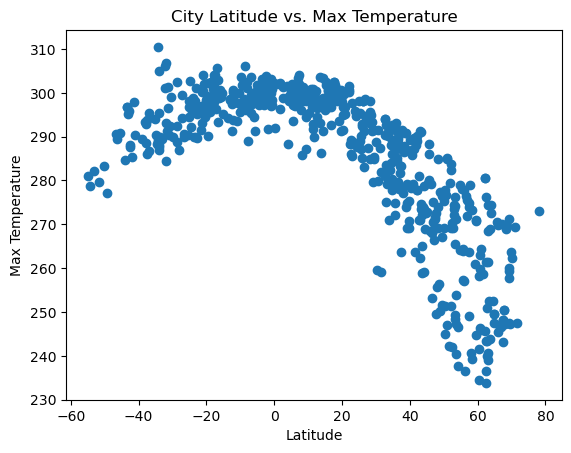

In [29]:
import matplotlib.pyplot as plt

# Scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

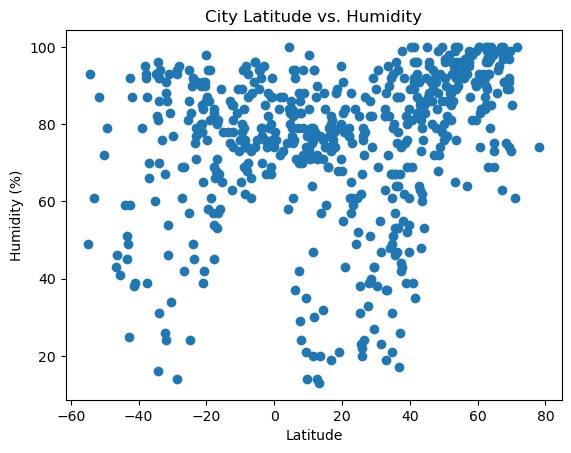

In [30]:
# Scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

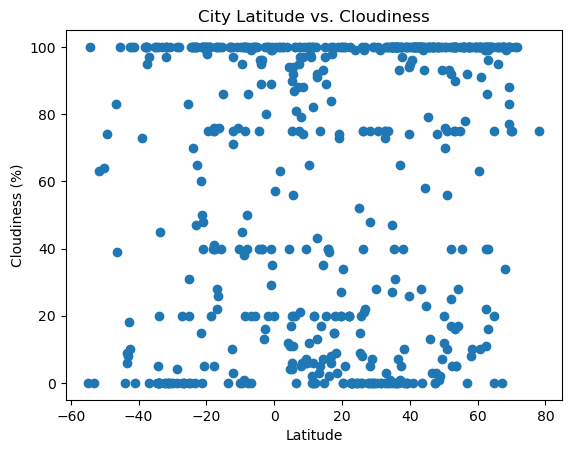

In [31]:
# Scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

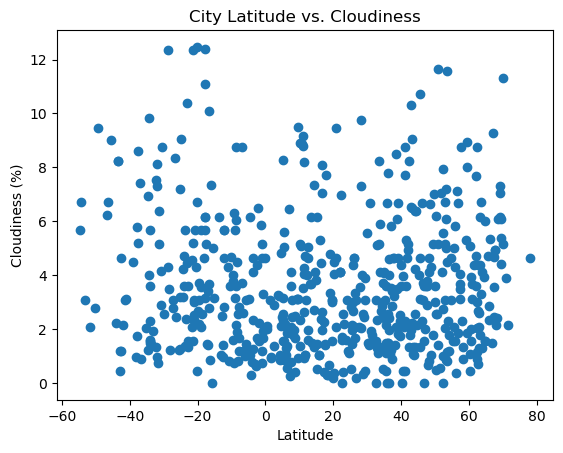

In [32]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,289.01,89,100,3.60,US,1702255942
2,sodra sandby,56.5667,16.6167,276.42,95,100,7.12,SE,1702256238
4,hami,42.8000,93.4500,270.92,64,100,2.18,CN,1702256130
5,severo-yeniseyskiy,60.3725,93.0408,234.58,100,100,0.45,RU,1702256239
6,jamestown,42.0970,-79.2353,277.92,87,100,5.14,US,1702255901


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto ayora,-0.7393,-90.3518,297.29,87,35,3.30,EC,1702256064
3,waitangi,-43.9535,-176.5597,284.79,59,0,2.24,NZ,1702256058
8,ambovombe,-25.1667,46.0833,296.85,86,31,1.27,MG,1702256239
13,nadi,-17.8000,177.4167,303.15,45,40,5.66,FJ,1702255920
14,mahajanga,-15.7167,46.3167,299.16,89,40,0.00,MG,1702256240


###  Temperature vs. Latitude Linear Regression Plot

The line equation is: y = -0.77x + 308.12
The r-value is: -0.8406053771599494


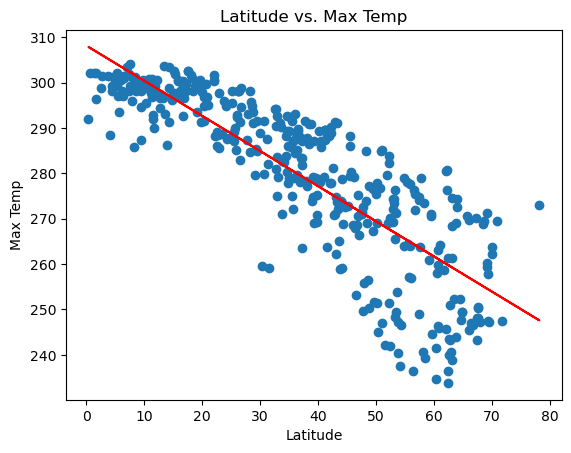

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = 0.27x + 301.75
The r-value is: 0.6149114800643039


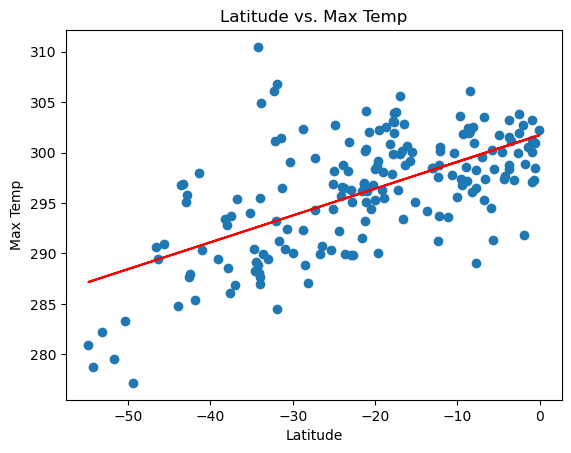

In [37]:
# Linear regression on S Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

In [38]:
#Response: The temperatures increase the closer the city is to the equator or 0 latitude.

### Humidity vs. Latitude Linear Regression Plot

The line equation is: y = 0.39x + 61.83
The r-value is: 0.37516729101191937


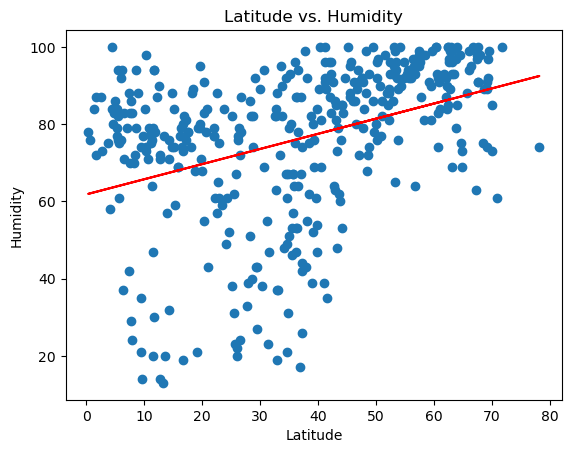

In [39]:
# Linear regression on N Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = 0.39x + 82.01
The r-value is: 0.29073618519492117


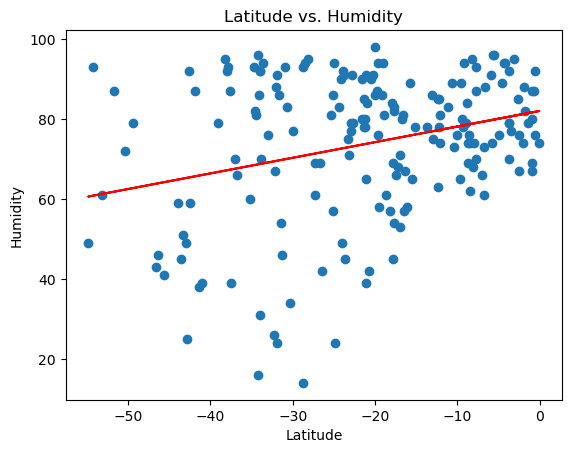

In [40]:
# Linear regression on S Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [41]:
#There is no strong relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The line equation is: y = 0.58x + 42.05
The r-value is: 0.27387897515476595


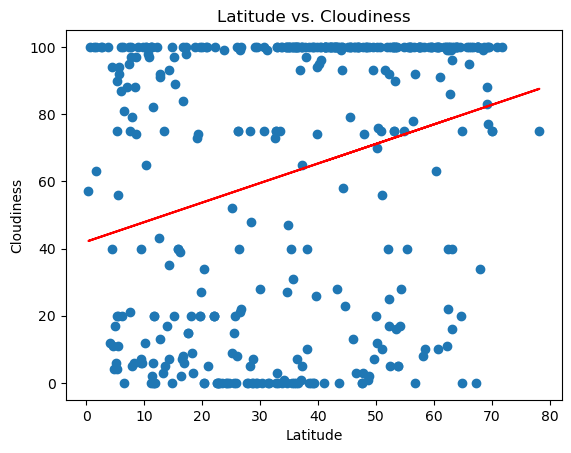

In [42]:
# Linear regression on N Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = 0.52x + 70.47
The r-value is: 0.17118733051528434


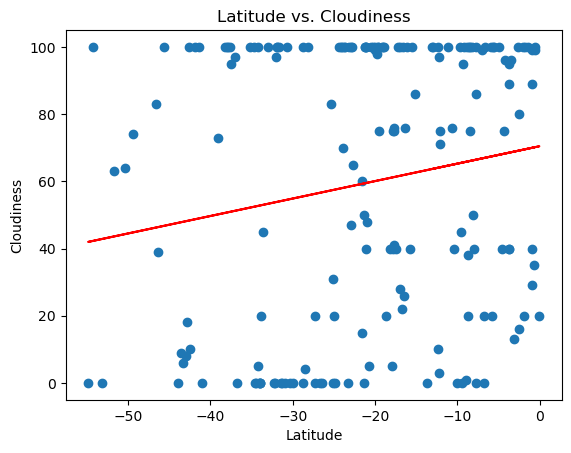

In [43]:
# Linear regression on N Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

In [44]:
#There is litle to no correlation between latitue and cloudiness

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The line equation is: y = 0.02x + 2.71
The r-value is: 0.1609304821004374


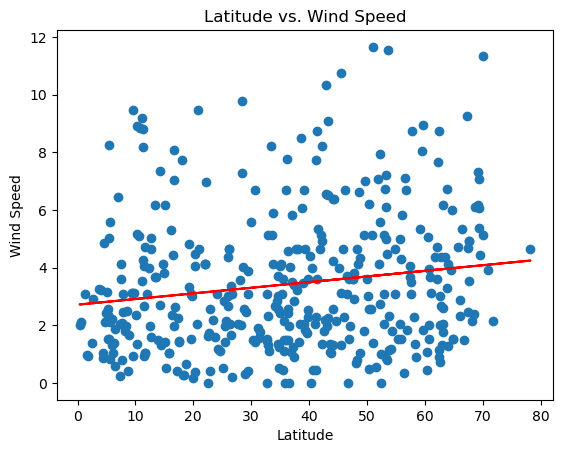

In [45]:
# Linear regression on N Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = -0.04x + 3.13
The r-value is: -0.1818844282952994


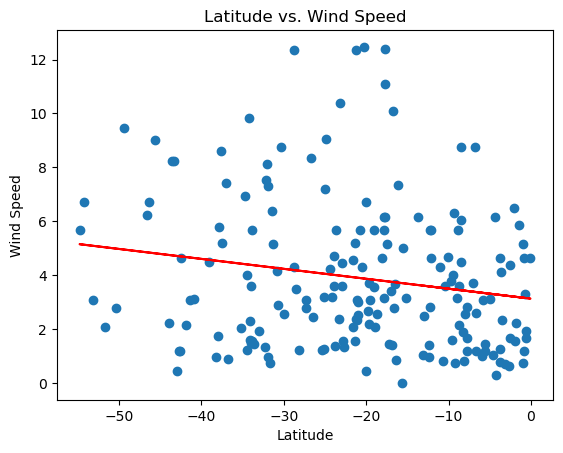

In [46]:
# Linear regression on N Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [33]:
#There is no correlation between wind speed and latitude on either hemisphere. 